# Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membuat dan Mengonversi Gambar

In [2]:
image_path = 'mangga.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) 

# Mengonversi Gambar ke Ruang Warna HVS

In [3]:
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2HSV)

# Mengidentifikasi Rentan Warna untuk Mangga dan Daun

In [5]:
mango_lower = np.array([20, 100, 100])
mango_upper = np.array([30, 255, 255])

leaves_lower = np.array([35, 100, 100])
leaves_upper = np.array([85, 255, 255])

# Membuat Masker untuk Mangga dan Daun

In [6]:
mask_mango = cv2.inRange(hsv_image, mango_lower, mango_upper)
mask_leaves = cv2.inRange(hsv_image, leaves_lower, leaves_upper)

# Melakukan Segmentasi mangga dan Daun Menggunakan Masker

In [9]:
segmented_mango = cv2.bitwise_and(original_image, original_image, mask=mask_mango)
segmented_leaves = cv2.bitwise_and(original_image, original_image, mask=mask_leaves)

# Menampilkan Hasil

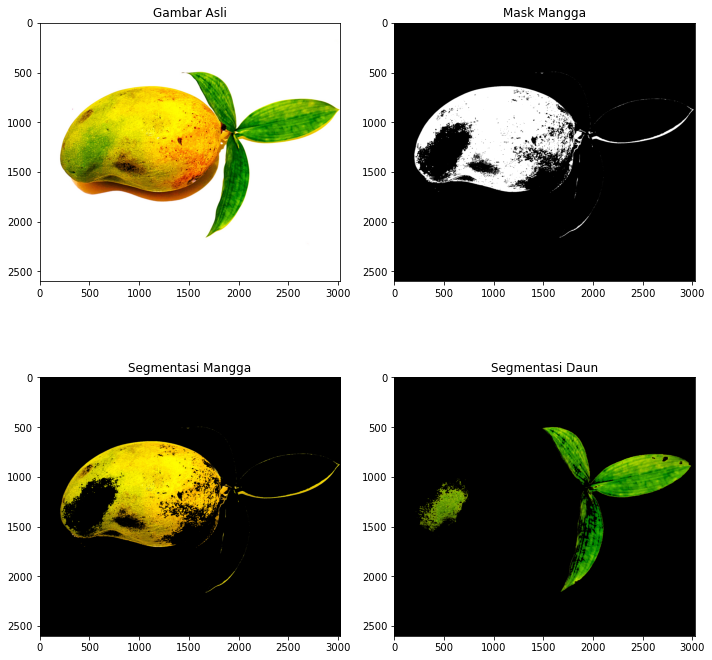

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(original_image)
axes[0, 0].set_title('Gambar Asli')

axes[0, 1].imshow(mask_mango, cmap='gray')
axes[0, 1].set_title('Mask Mangga')

axes[1, 0].imshow(segmented_mango)
axes[1, 0].set_title('Segmentasi Mangga')

axes[1, 1].imshow(segmented_leaves)
axes[1, 1].set_title('Segmentasi Daun')

plt.tight_layout()
plt.show()